In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import math
from tqdm import tqdm
import Util as ut
import seaborn as sns
from DataLoader import GetSpectrum
%matplotlib inline

import TrackFreq

os.chdir("/Users/yhamae/OneDrive/astro/FLASHING/peak/")
err_file = []

# source_list = []
# file_list = os.listdir("/Users/yhamae/OneDrive/astro/FLASHING/peak/")
# ref_freq_list = ['H2O', 'H2OR', 'H2OB', 'SiOv3', 'SiOv2', 'SiOv1', 'SiOv0']
# # print(file_list)
# for fname in file_list:
#     if not fname.split('_')[0] in [source_list[i][0] for i in range(0, len(source_list))]:
#         for val in ref_freq_list:
#             source_list.append([fname.split('_')[0], val])

# source_list = [['RAS15193+31', 'H2O']]
source_list = [['IRAS18286-09', 'H2O']]





for i in tqdm(range(0, len(source_list))):
    try:
        tf = TrackFreq.TrackingFrequently()
        tf.print_load_data = False
        tf.source = source_list[i][0]  # 天体名
        tf.ref_freq = source_list[i][1]  # 分子名（H2O,SiOなど）
        tf.directory = os.path.join("./")  # ファイルを検索するディレクトリ
        tf.oname = os.path.join("/Users/yhamae/OneDrive/astro/FLASHING/dynamic_spectrum/" + source_list[i][0] + '_' + source_list[i][1] + '.txt')  # 書き出すテキストファイルの名前
        tf.source_keywoed = source_list[i][0] + "_" + source_list[i][1] + "_"
#         tf.uselim = True
#         tf.ymax = 10
#         tf.ymin = 0
        tf.get_peak_data()

    except:
        err_file.append(tf.oname)
print(tf.oname)

print('\n'.join(err_file))
# tf = TrackFreq.TrackingFrequently()
# tf.load_data(tf.oname)
# data = GetSpectrum.load_file(tf.oname)
# # print(data)
# mjd = [float(data[i][0]) for i in range(0, len(data))]
# lsr = [float(data[i][1]) for i in range(0, len(data))]
# flux = [math.log10(float(data[i][2])) for i in range(0, len(data))]

# fig = plt.figure(figsize = (16,32))
# ax1 = fig.add_subplot(1,1,1)
# ax1.scatter(mjd, lsr, c = flux, cmap = 'jet')
# # plt.ylim(120,160)
# plt.show

100%|██████████| 1/1 [00:29<00:00, 29.00s/it]

/Users/yhamae/OneDrive/astro/FLASHING/dynamic_spectrum/IRAS18286-09_H2O.txt



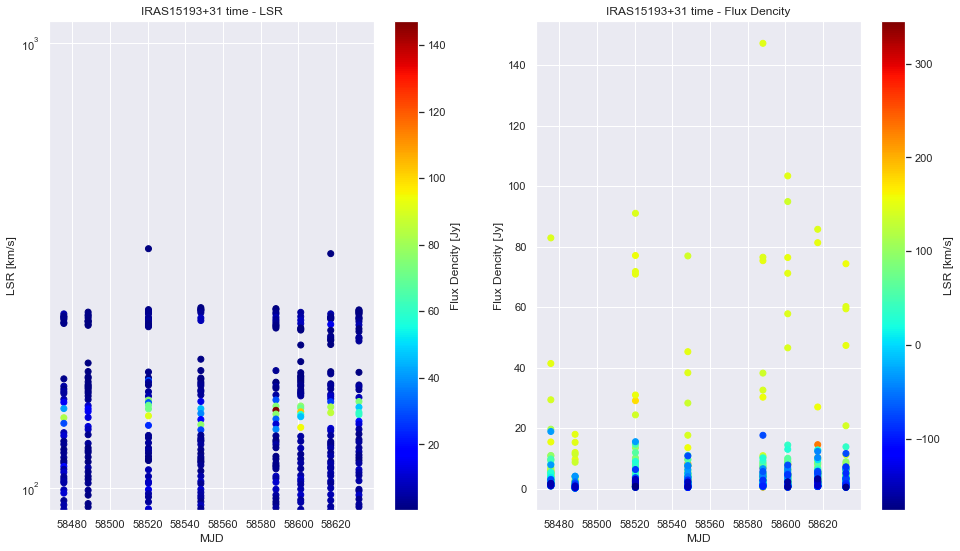

In [2]:
sns.set()
fig = plt.figure(figsize = (16,9))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('IRAS15193+31 time - LSR')
im = ax1.scatter(tf.time, tf.raw_freq, c = tf.raw_val, cmap = 'jet')
ax1.set_ylabel('LSR [km/s]')
ax1.set_xlabel('MJD')
cbar = plt.colorbar(im)
cbar.set_label('Flux Dencity [Jy]')
plt.yscale('log')
# plt.xticks(list(plt.xticks())[0], [ut.mjd2datetime(int(s)).strftime("%y.%m.%d") + '\n' + str(s) for s in list(plt.xticks())[0]])

ax2 = fig.add_subplot(1,2,2)
ax2.set_title('IRAS15193+31 time - Flux Dencity')
im = ax2.scatter(tf.time, tf.raw_val, c = tf.raw_freq, cmap = 'jet')
ax2.set_ylabel('Flux Dencity [Jy]')
ax2.set_xlabel('MJD')
cbar = plt.colorbar(im)
cbar.set_label('LSR [km/s]')
# plt.xticks(list(plt.xticks())[0], [ut.mjd2datetime(int(s)).strftime("%y.%m.%d") + '\n' + str(s) for s in list(plt.xticks())[0]])

plt.show()